In [3]:
from nltk.corpus import PlaintextCorpusReader
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from collections import defaultdict
from nltk.stem import WordNetLemmatizer
import nltk
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from os import path
import math
import json

In [4]:
CharacterDialogue = {}

# Opening JSON file
with open('CharacterDialogue.json', encoding='utf-8') as json_file:
    data = json.load(json_file)
    CharacterDialogue = data

In [5]:
lemmatizer = WordNetLemmatizer()
stop_words = stopwords.words('english')
tokenizer = RegexpTokenizer(r'\w+')
wnl = nltk.WordNetLemmatizer()
extra_stopwords = ["u"]
stop_words = stop_words + extra_stopwords


In [6]:

characters = ['frodo baggins','aragorn ii elessar','boromir','meriadoc brandybuck','samwise gamgee','gandalf','gimli','gollum','legolas','saruman','peregrin took']

charWords = {}
nltkChar = {}
fdistChar = {}
for name in characters:
    data = CharacterDialogue[name]
    charWords[name] = []
    for item in data:
        tokens = nltk.word_tokenize(item)
        words = [w.lower() for w in tokens if w.isalpha()]
        clean_words = [wnl.lemmatize(w) for w in words if w not in stop_words]  # Lemmatize the words and skip stopwords
        charWords[name].extend(clean_words)
    nltkChar[name] =  nltk.Text(charWords[name])
    fdistChar[name] = nltk.FreqDist(nltkChar[name])

In [7]:
c = characters[1]
ring_mask = np.array(Image.open("cloudMasks/boromir.jpeg"))

plt.figure(figsize=(12,8))
wordcloud = WordCloud(background_color="white", 
                      width=1000,
                      height=500,
                      max_words=2000).generate_from_frequencies(fdistChar[c])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for ' + c)
plt.tight_layout()
plt.show()

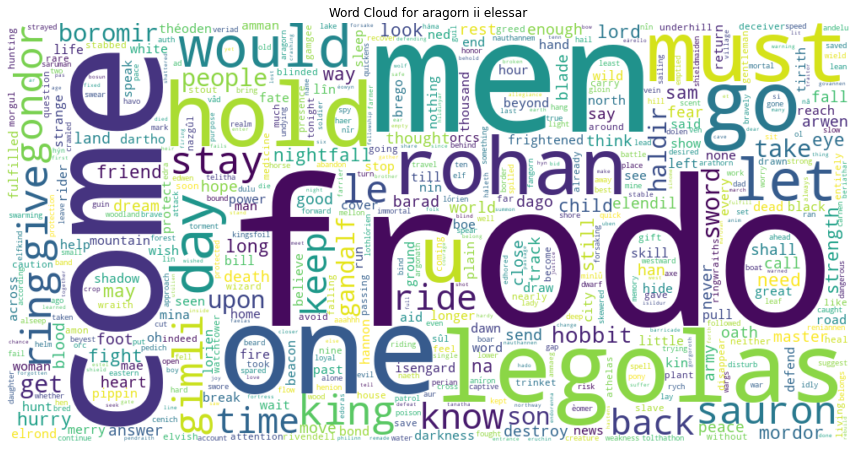

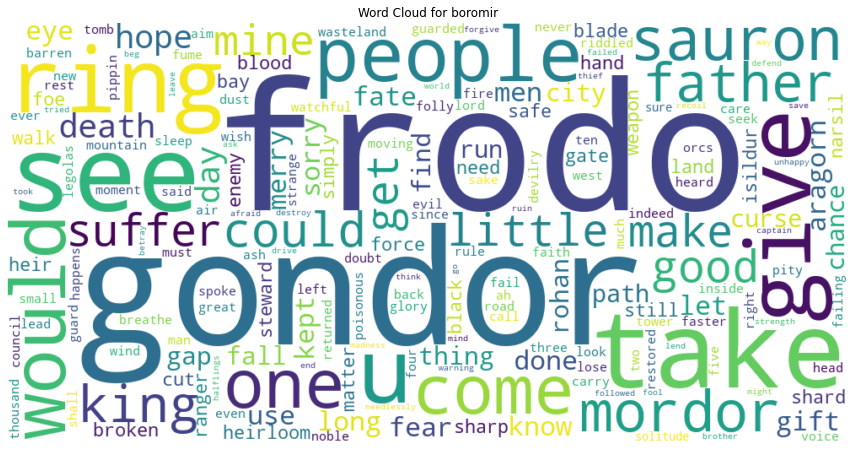

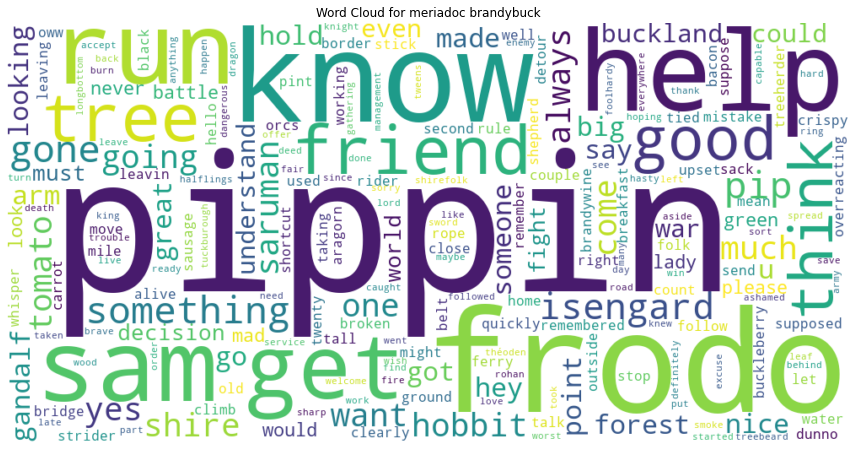

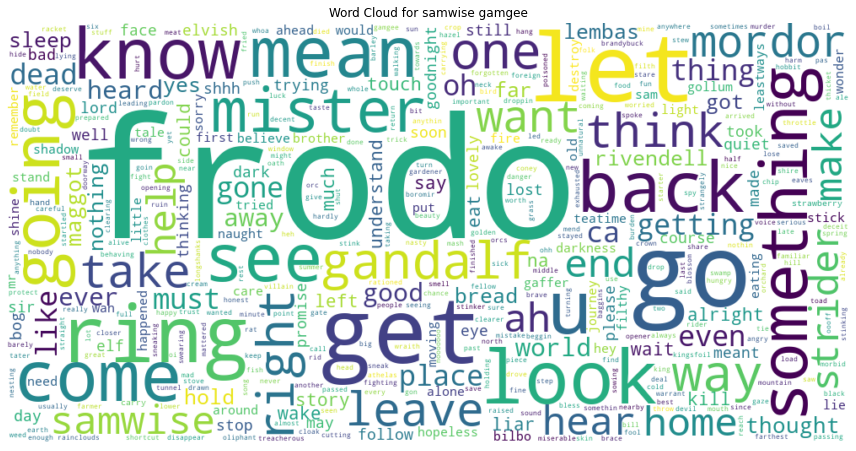

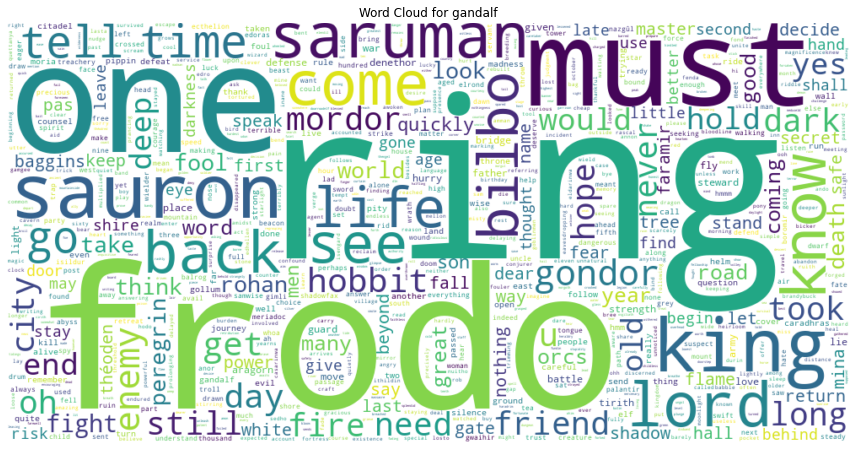

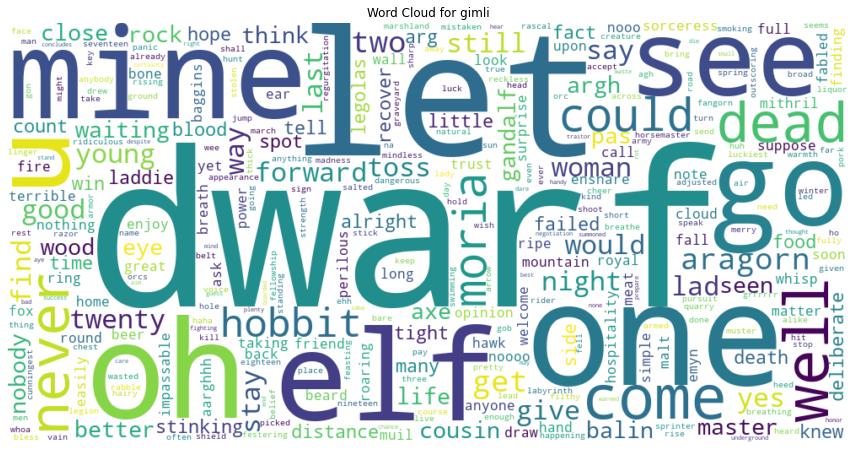

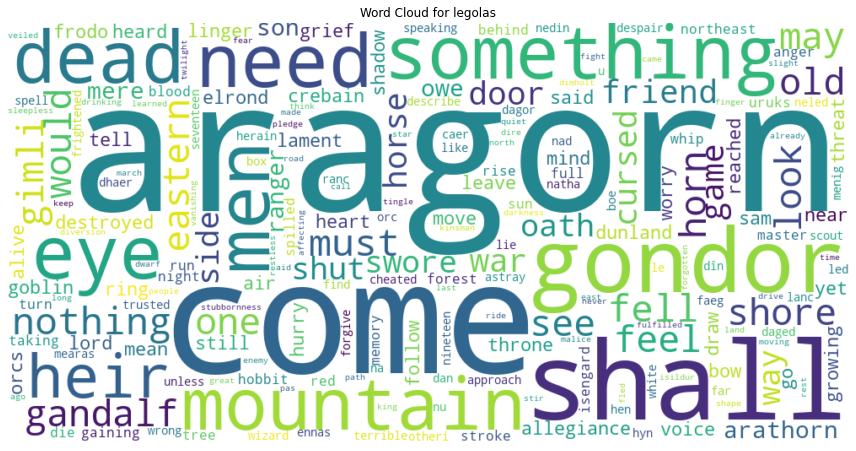

In [8]:
for name in characters:
    plt.figure(figsize=(12,8))
    wordcloud = WordCloud(background_color="white", 
                        width=1000,
                        height=500,
                        max_words=2000).generate_from_frequencies(fdistChar[name])
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title('Word Cloud for ' + name)
    plt.tight_layout()
    plt.show()

In [19]:
def calcRateScript(theScript,appearsInScripts):
    wordsInScript = defaultdict(list)
    tokens = nltk.word_tokenize(theScript)
    words = [w.lower() for w in tokens if w.isalpha()]
    clean_words = [wnl.lemmatize(w) for w in words if w not in stop_words]

    
    nltk_script = nltk.Text(clean_words)
    fdist_script = nltk.FreqDist(nltk_script)
        
    for word in fdist_script:
        wordTC = fdist_script[word]
        wordsInScript[word].append(wordTC)

    superstring = ""
    for term, count in wordsInScript.items():
        TC = sum(count)
        IDF = np.log(3 / len(appearsInScripts[term]))

        TCIDF = math.ceil(TC*IDF)

        superstring += (term + " ") * TCIDF
    
    return superstring

In [10]:
with open("transcripts/fotrWc.txt",encoding='utf-8') as f:
        fotrWc = f.read()

with open("transcripts/2tWc.txt",encoding='utf-8') as f:
        ttWc = f.read()

with open("transcripts/rotkWc.txt",encoding='utf-8') as f:
        rotkWc = f.read()

scripts = [fotrWc,ttWc,rotkWc]
allMovies = fotrWc + ttWc + rotkWc

In [20]:
appearsInScripts = defaultdict(list)

# Looping through the books and count in how many books each words appears
for i in range(0,len(scripts)):
    tokens = nltk.word_tokenize(scripts[i])
    words = [w.lower() for w in tokens if w.isalpha()]
    clean_words = [wnl.lemmatize(w) for w in words if w not in stop_words]  # Lemmatize the words and skip stopwords
    nltk_script = nltk.Text(clean_words)
    fdist_script = nltk.FreqDist(nltk_script)
    
    for word in fdist_script:
        if i == 0:
            appearsInScripts[word].append(1)
        elif i == 1:
            appearsInScripts[word].append(2)
        elif i == 2:
            appearsInScripts[word].append(3)

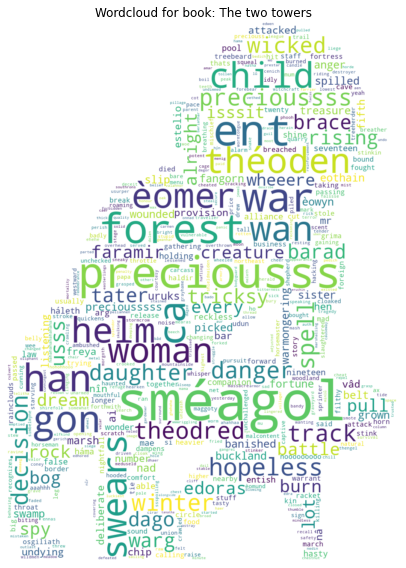

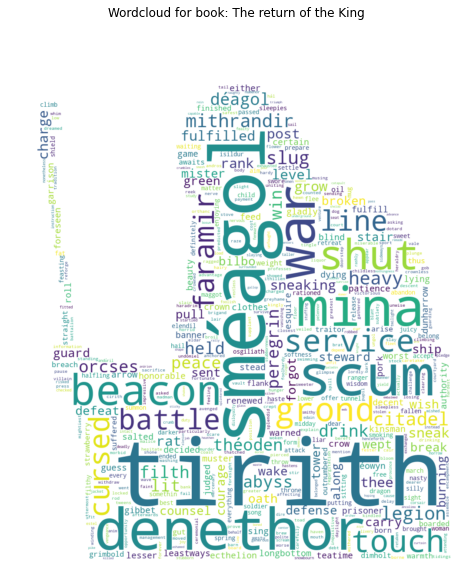

In [21]:
frodo_mask = np.array(Image.open(path.join("books/mask/frodo.png")))
gollum_mask = np.array(Image.open(path.join("books/mask/gollum.png")))
gandalf_mask = np.array(Image.open(path.join("books/mask/gandalf.png")))
maskList = [frodo_mask, gollum_mask, gandalf_mask]
titles = ['The fellowship of the ring','The two towers','The return of the King']

for i in range(0,len(scripts)):
    plt.figure(figsize=(10,8))

    scriptCloud = calcRateScript(scripts[i], appearsInScripts)


    wordcloud = WordCloud(background_color="white",
                          collocations=False,
                          width=2000,
                          height=1000,
                          max_words=500,
                          mask=maskList[i]
                         ).generate(scriptCloud)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Wordcloud for book: %s" %titles[i])

    
    plt.tight_layout()
    plt.show()



In [12]:
print('fotr,',len(fotrWc))
print('tt',len(ttWc))
print('rotk',len(rotkWc))
print('all',len(allMovies))

fotr, 45121
tt 40578
rotk 47390
all 133089


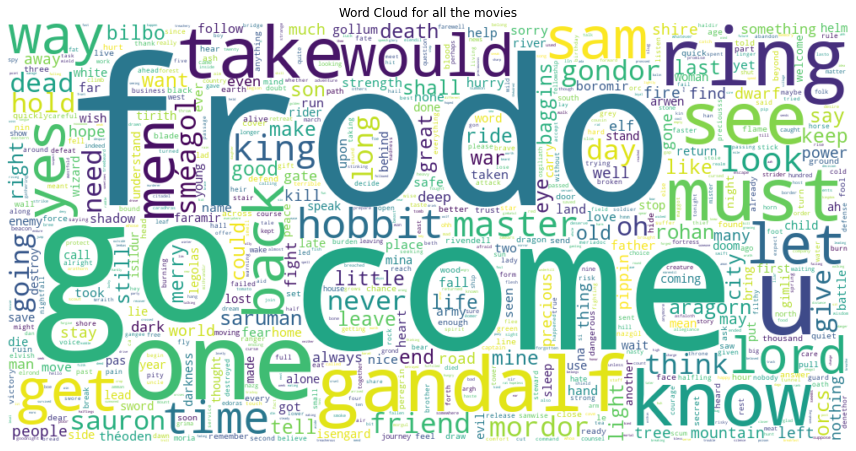

In [13]:
allMovieTokens = nltk.word_tokenize(allMovies)
allMoviesWords = [w.lower() for w in allMovieTokens if w.isalpha()]
allMoviesClean_words = [wnl.lemmatize(w) for w in allMoviesWords if w not in stop_words]  # Lemmatize the words and skip stopwords
allMovieNltkChar =  nltk.Text(allMoviesClean_words)
allMoviesFdistChar = nltk.FreqDist(allMovieNltkChar)

plt.figure(figsize=(12,8))
wordcloud = WordCloud(background_color="white", 
                    width=1000,
                    height=500,
                    max_words=2000).generate_from_frequencies(allMoviesFdistChar)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for all the movies')
plt.tight_layout()
plt.show()